In [14]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Set parameters
N = 50
NN = 100
p_values = np.arange(0.45, 0.65 + 0.01, 0.01) 

# Site percolation:

In [16]:
avg_sizes_1 = []
avg_sizes_2 = []

In [17]:
for p in p_values:
    # Initialize lists to store sizes for each lattice realization
    sizes_1 = []
    sizes_2 = []
    
    for i in range(NN):
        # Build lattice graph
        g = ig.Graph.Lattice([N, N], circular=False, directed=False)

        # Generate random numbers and delete vertices
        rand = np.random.rand(g.vcount())
        g.delete_vertices([v.index for v in g.vs if rand[v.index] > p])

        # Calculate clusters and their sizes
        clusters = g.connected_components()
        sizes = clusters.sizes()
        sizes.sort(reverse=True)
        sizes.append(0)

        # Append the sizes of the first two clusters to the lists for this realization
        sizes_1.append(sizes[0])
        sizes_2.append(sizes[1])
    
    # Calculate the average sizes of the first two clusters across all lattice realizations
    avg_sizes_1.append(np.mean(sizes_1))
    avg_sizes_2.append(np.mean(sizes_2))

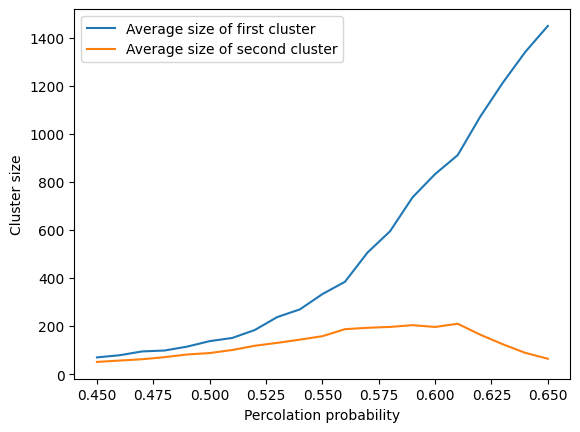

In [18]:
# Plot the average sizes of the first two clusters as a function of the percolation probability
plt.plot(p_values, avg_sizes_1, label='Average size of first cluster')
plt.plot(p_values, avg_sizes_2, label='Average size of second cluster')
plt.xlabel('Percolation probability')
plt.ylabel('Cluster size')
plt.legend()
plt.show()

# Bond percolation:

In [19]:
avg_sizes_1 = []
avg_sizes_2 = []

In [20]:
for p in p_values:
    # Initialize lists to store sizes for each lattice realization
    sizes_1 = []
    sizes_2 = []
    
    for i in range(NN):
        # Build lattice graph
        g = ig.Graph.Lattice([N, N], circular=False, directed=False)

        # Generate random numbers and delete vertices
        rand = np.random.rand(g.ecount()) #genera n*n numeri random
        g.delete_edges([e.index for e in g.es if rand[e.index] > p]) #togliamo i legami che non sono stati percolati
        
        # Calculate clusters and their sizes
        clusters = g.connected_components()
        sizes = clusters.sizes()
        sizes.sort(reverse=True)
        sizes.append(0)

        # Append the sizes of the first two clusters to the lists for this realization
        sizes_1.append(sizes[0])
        sizes_2.append(sizes[1])
    
    # Calculate the average sizes of the first two clusters across all lattice realizations
    avg_sizes_1.append(np.mean(sizes_1))
    avg_sizes_2.append(np.mean(sizes_2))

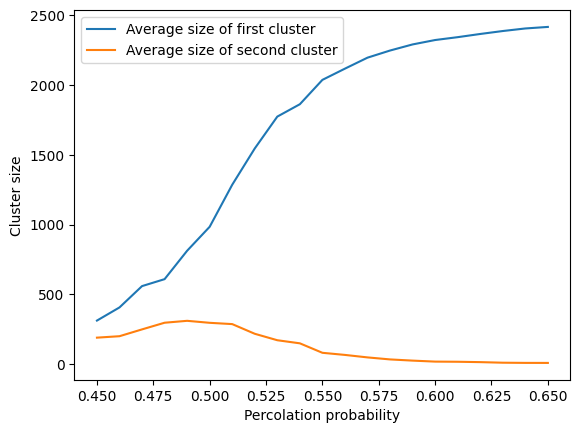

In [21]:
# Plot the average sizes of the first two clusters as a function of the percolation probability
plt.plot(p_values, avg_sizes_1, label='Average size of first cluster')
plt.plot(p_values, avg_sizes_2, label='Average size of second cluster')
plt.xlabel('Percolation probability')
plt.ylabel('Cluster size')
plt.legend()
plt.show()